In [10]:
with open('./Checkpoint/loss.txt') as f:
    lines = f.readlines()
    # print(lines)

loss = []
for line in lines:
    if 'Total loss' in line:
        # print(line[24:34])
        loss.append(float(line[24:32]))
print(len(loss))
# s = '[01:20:38] Batch:  51; D loss: 0.00051; G loss: 1004.65155;'
# print(s[31:39])

104


[10.54274, 11.72698, 11.77592, 11.73978, 11.72146, 11.83733, 11.64991, 11.62373, 11.7092, 11.72652, 11.62117, 11.65978, 11.59487, 11.6782, 11.71235, 11.6189, 11.56833, 11.53976, 11.5848, 11.67091, 11.65748, 11.63437, 11.54633, 11.59781, 11.51526, 11.5865, 11.56125, 11.52981, 11.53958, 11.51548, 11.55811, 11.48187, 11.55156, 11.42645, 11.49436, 11.47919, 11.39564, 11.36832, 11.38409, 11.32506, 11.35308, 11.40413, 11.3845, 11.33503, 11.25674, 11.27512, 11.29276, 11.2157, 11.29931, 11.22007, 11.32106, 11.21806, 11.29342, 11.305, 11.17284, 11.16636, 11.22491, 11.21198, 11.19965, 11.24107, 11.18182, 11.17942, 11.1959, 11.18961, 11.17944, 11.12746, 11.18037, 11.1379, 11.15328, 11.20738, 11.09274, 11.14561, 11.09979, 11.17094, 11.07848, 11.10728, 11.09316, 11.08538, 11.06639, 11.16842, 11.17264, 11.18071, 11.19522, 11.04786, 11.09187, 11.08348, 11.14938, 11.09438, 11.09793, 11.10869, 11.16122, 11.07541, 11.11031, 11.08471, 11.0429, 11.13607, 11.09687, 11.09251, 11.0906, 11.03375, 11.12985, 11

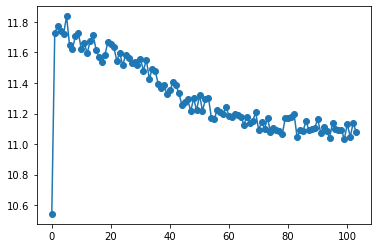

In [11]:
import matplotlib.pyplot as plt

print(loss)
plt.plot(loss, '-o')
plt.show()

In [1]:
import cv2
import numpy as np
import torch
from model import localLossL1
from torchvision import transforms
from data import mat_merge, mat_process

In [10]:
imgpath = '../Datasets/CUFS/CUHK/sketches/00.png'
img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32)
img = img/256
print(img.shape)
print(img)

(250, 200)
[[0.9921875  0.9921875  0.9921875  ... 0.99609375 0.99609375 0.99609375]
 [0.9921875  0.9921875  0.9921875  ... 0.99609375 0.99609375 0.99609375]
 [0.9921875  0.9921875  0.9921875  ... 0.99609375 0.99609375 0.99609375]
 ...
 [0.96484375 0.96875    0.921875   ... 0.984375   0.85546875 0.77734375]
 [0.9375     0.83984375 0.49609375 ... 0.76953125 0.76953125 0.89453125]
 [0.67578125 0.50390625 0.27734375 ... 0.7421875  0.875      0.83203125]]


In [9]:
imgpath = '../Datasets/CUFS/CUHK/photos/00.png'
img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# img = img.astype(np.float32)
# img = img/256
print(img.shape)
print(img)

(250, 200, 3)
[[[114 221 255]
  [114 221 255]
  [116 220 255]
  ...
  [125 217 255]
  [125 217 255]
  [125 217 255]]

 [[114 221 255]
  [114 221 255]
  [116 220 255]
  ...
  [125 217 255]
  [125 217 255]
  [125 217 255]]

 [[114 221 255]
  [114 221 255]
  [116 220 255]
  ...
  [125 217 255]
  [125 217 255]
  [125 217 255]]

 ...

 [[ 97 164 206]
  [ 93 157 195]
  [ 84 138 174]
  ...
  [182 185 192]
  [191 190 195]
  [181 179 184]]

 [[ 87 147 184]
  [ 58 112 148]
  [ 38  83 112]
  ...
  [207 179 175]
  [182 151 146]
  [203 168 162]]

 [[ 32  88 123]
  [  9  59  92]
  [  1  43  68]
  ...
  [188 148 136]
  [166 118 108]
  [175 125 114]]]


In [9]:
# spath = '../Datasets/CUFS/AR/sketches/102.jpg'
# mpath = '../Datasets/CUFS/AR/mat2/102.mat'
# apath = './Output/1/1.jpg'
# bpath = '../Datasets/CUFS/AR/photos/102.jpg'
spath = '../Datasets/CUFS/AR/sketches/102.jpg'
mpath = '../Datasets/CUFS/AR/mat2/102.mat'
apath = './Output/700/1.jpg'
bpath = '../Datasets/CUFS/AR/photos/102.jpg'

s = cv2.imread(spath, cv2.IMREAD_GRAYSCALE)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
s = transform(s)
print(s)
s = np.transpose(s.numpy(), (1, 2, 0))
sf = mat_merge(s, mpath)
sf = np.transpose(sf, (2, 0, 1))
sf = mat_process(sf)
sf = torch.from_numpy(sf)
sf.unsqueeze_(0)
print(sf.shape)

a = cv2.imread(apath)
a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
a = np.transpose(a, (2, 0, 1))
# cv2.imshow('a', a)
a = a.astype(np.float32)
a = torch.from_numpy(a)
print(a.shape)
# print(a)
# cv2.waitKey()

b = cv2.imread(bpath)
# b = cv2.cvtColor(b, cv2.COLOR_RGB2BGR)
# cv2.imshow('b', b)
# cv2.waitKey()
b = np.transpose(b, (2, 0, 1))
b = b.astype(np.float32)
b = torch.from_numpy(b)
print(b.shape)
# print(b)

l1 = torch.nn.L1Loss()
gl = l1(a, b)
ll = localLossL1(a, b, sf, l1)
tl = 0.7 * gl.item() + 0.3 * ll.item()
tl *= 10
print(gl)
print(ll)
print(tl)


tensor([[[0.9922, 0.9765, 0.9608,  ..., 0.9843, 0.9843, 0.9843],
         [0.9765, 0.9686, 0.9608,  ..., 0.9765, 0.9843, 0.9843],
         [0.9686, 0.9686, 0.9608,  ..., 0.9765, 0.9765, 0.9843],
         ...,
         [0.9294, 0.9059, 0.8510,  ..., 0.9765, 1.0000, 0.9765],
         [0.8824, 0.8745, 0.8745,  ..., 1.0000, 0.9922, 1.0000],
         [0.8824, 0.8745, 0.8745,  ..., 0.9922, 0.9529, 0.9686]]])
torch.Size([1, 9, 250, 200])
torch.Size([3, 250, 200])
torch.Size([3, 250, 200])
tensor(15.2266)
tensor(6.7152)
126.73138856887817
